## NETFLIX DATABASE
Dataset con informacion sobre la plataforma Netflix (producciones, castings, directores, paises, anios de lanzamiento)

importamos librerias

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## ETL (EXTRACTION, TRANSFORMATION, LOAD)

In [2]:
df_netflix=pd.read_csv('netflix_dataset.csv')
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


chequeamos informacion general del dataset

In [3]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


verificamos valores nulos

In [4]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df_netflix.shape

(8807, 12)

eliminamos los valores nulos encontrados

In [6]:
df_netflix.dropna(inplace=True)

In [7]:
df_netflix.shape

(5332, 12)

In [8]:
df_netflix.reset_index(inplace=True)

In [9]:
df_netflix.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [10]:
df_netflix=df_netflix.drop(columns=['index'],axis=1)

In [11]:
# eliminamos columna no necesaria para el analisis
df_netflix=df_netflix.drop(columns=['description'])

In [12]:
# renombramos columnas
df_netflix=df_netflix.rename(columns={'listed_in':'genres'})

In [13]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [14]:
df_netflix['rating'].value_counts()

rating
TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

renombramos los ratings por las edades disponibles para cada uno de ellos

In [15]:
df_netflix['rating']=df_netflix['rating'].replace({'TV-MA':'Mayores 17',
                                                   'TV-14':'mayores 14',
                                                   'R':'mayores 17',
                                                   'PG-13':'mayores 13',
                                                   'TV-PG':'mayores 13',
                                                   'PG':'mayores 10',
                                                   'TV-G':'familiar',
                                                   'TV-Y7':'mayores 7',
                                                   'TV-Y':'mayores 7',
                                                   'NR':'sin calificar',
                                                   'G':'familiar',
                                                   'TV-Y7-FV':'mayores 7',
                                                   'UR':'sin calificar',
                                                   'NC-17':'no menores 17'})

In [16]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,Mayores 17,125 min,"Dramas, Independent Movies, International Movies"
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,mayores 14,9 Seasons,"British TV Shows, Reality TV"
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,mayores 13,104 min,"Comedies, Dramas"
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,Mayores 17,127 min,"Dramas, International Movies"
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,mayores 14,166 min,"Comedies, International Movies, Romantic Movies"


In [17]:
df_netflix['date_added']=pd.to_datetime(df_netflix['date_added'],errors='coerce')

In [18]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5328 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  genres        5332 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 458.3+ KB


In [19]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,Mayores 17,125 min,"Dramas, Independent Movies, International Movies"
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,mayores 14,9 Seasons,"British TV Shows, Reality TV"
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,mayores 13,104 min,"Comedies, Dramas"
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,Mayores 17,127 min,"Dramas, International Movies"
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,mayores 14,166 min,"Comedies, International Movies, Romantic Movies"


In [20]:
#guardamos df a archivo csv
df_netflix.to_csv('netflix_dataset_limpio.csv')

## EDA (EXPLORATORY DATA ANALYSIS)

CANTIDAD DE SERIES Y PELICULAS QUE TIENE NETFLIX

In [21]:
series_peliculas=df_netflix['type'].value_counts()
print(series_peliculas)

type
Movie      5185
TV Show     147
Name: count, dtype: int64


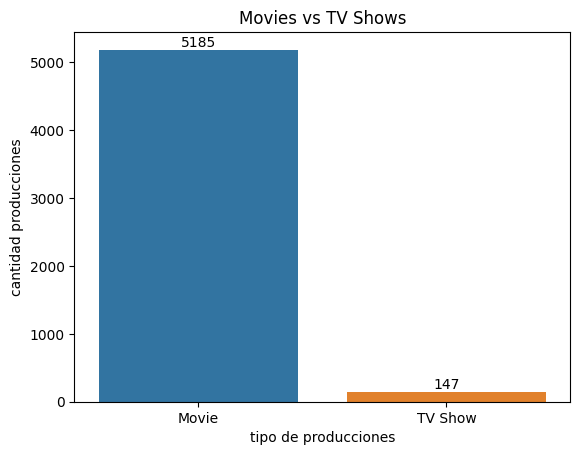

In [22]:
#graficamente podemos ver que netflix tiene mayor cantidad de peliculas que series (diferencia es muy amplia)
ax=sns.countplot(x='type', data=df_netflix)
ax.set(xlabel='tipo de producciones',ylabel='cantidad producciones',title='Movies vs TV Shows')
contador_datos=df_netflix['type'].value_counts()
orden=contador_datos.sort_values(ascending=False).index
for i,count in enumerate(contador_datos):
    plt.text(i,count,str(count),ha='center',va='bottom')
plt.show()

grafica 2

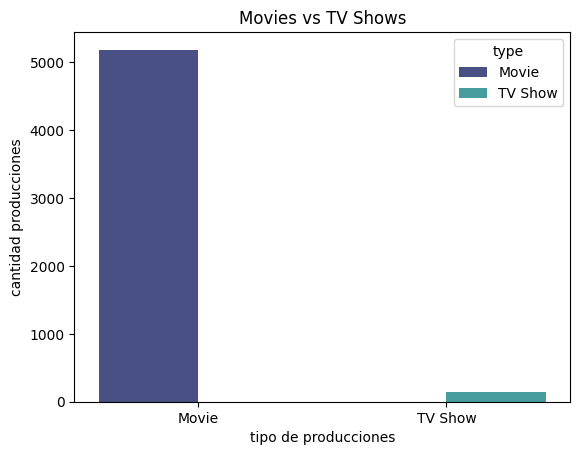

In [23]:
ax=sns.countplot(x='type', data=df_netflix , hue='type', palette='mako')
ax.set(xlabel='tipo de producciones',ylabel='cantidad producciones',title='Movies vs TV Shows')
plt.show()

DE QUE RATING HAY MAS CLASIFICACIONES

In [24]:
cantidad_ratings=df_netflix['rating'].value_counts()
print(cantidad_ratings)

rating
Mayores 17       1822
mayores 14       1214
mayores 13        901
mayores 17        778
mayores 10        275
mayores 7         155
familiar          124
sin calificar      61
no menores 17       2
Name: count, dtype: int64


In [25]:
def contador_valores(dataframe,columna):
    contador_datos=dataframe[columna].value_counts()
    orden=contador_datos.sort_values(ascending=False).index
    for indice,count in enumerate(contador_datos):
        plt.text(indice,count,str(count),ha='center',va='bottom')
    return orden

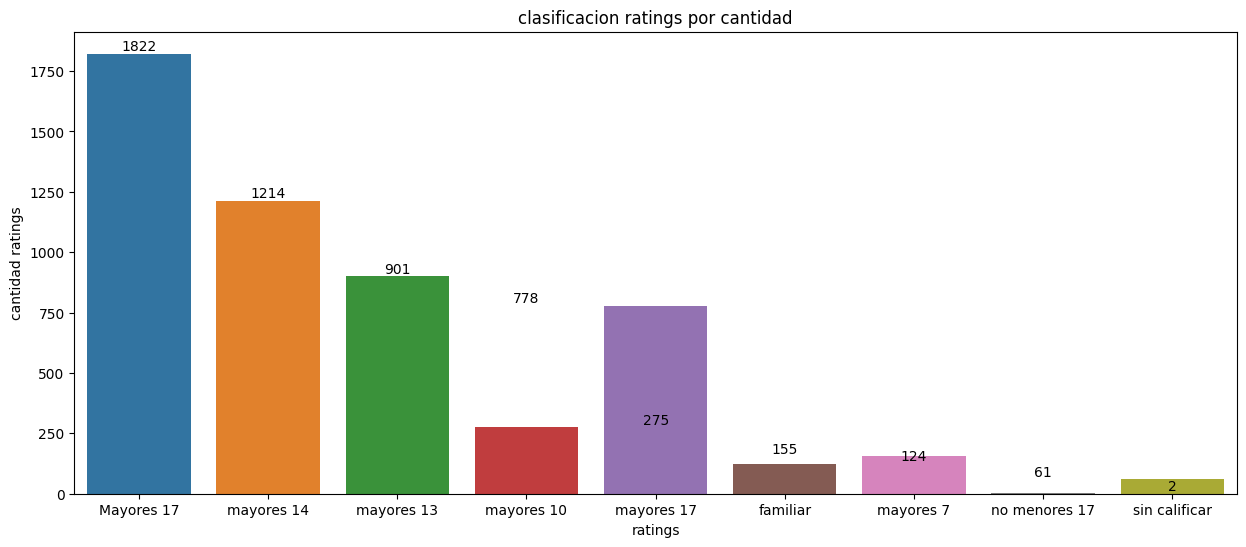

In [26]:
# podemos ver que el rating con mas producciones es 'mayores 17' tiene mucho sentido ya que la gran mayoria de clientes netflix son personas adultas
plt.figure(figsize=[15,6])
figura=sns.countplot(x='rating', data=df_netflix)
contador_valores(df_netflix,'rating')
plt.xlabel('ratings')
plt.ylabel('cantidad ratings')
plt.title('clasificacion ratings por cantidad')
plt.show()

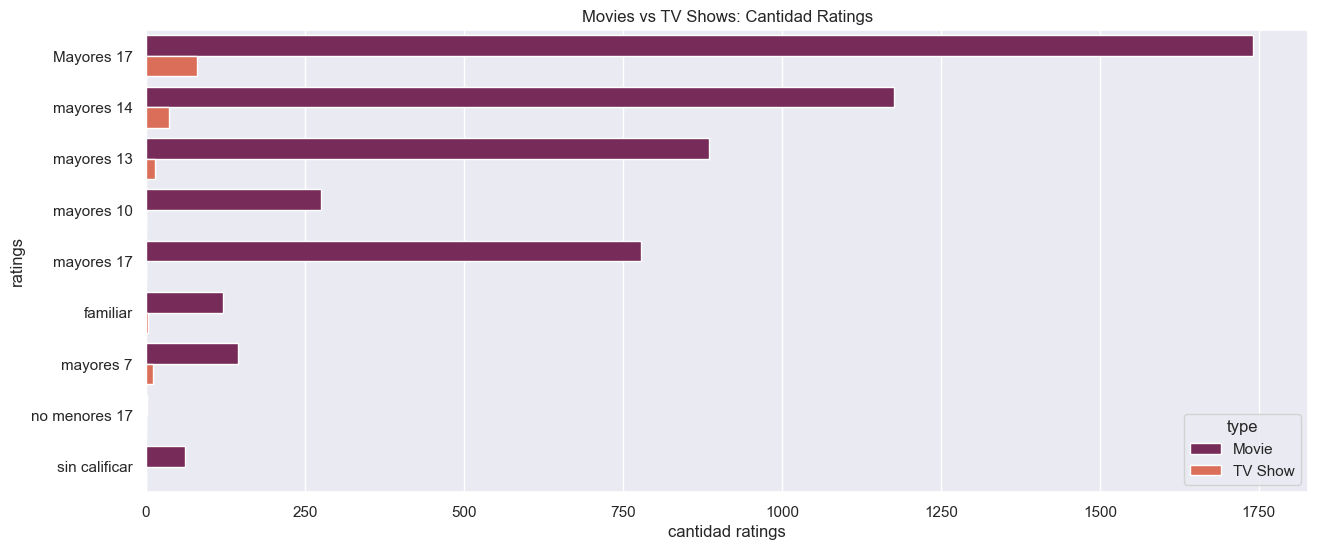

In [27]:
# graficamente podemos ver que las peliculas dominan todos los ratings de la plataforma, logicamente es asi ya que hay muchisimas mas peliculas que series
sns.set(style='darkgrid')
plt.figure(figsize=[15,6])
ax=sns.countplot(y='rating', data=df_netflix, hue='type', palette='rocket')
ax.set(xlabel='cantidad ratings', ylabel='ratings', title='Movies vs TV Shows: Cantidad Ratings')
plt.show()

TOP 20 DIRECTORES CON MAS PELICULAS

<Axes: xlabel='count', ylabel='director'>

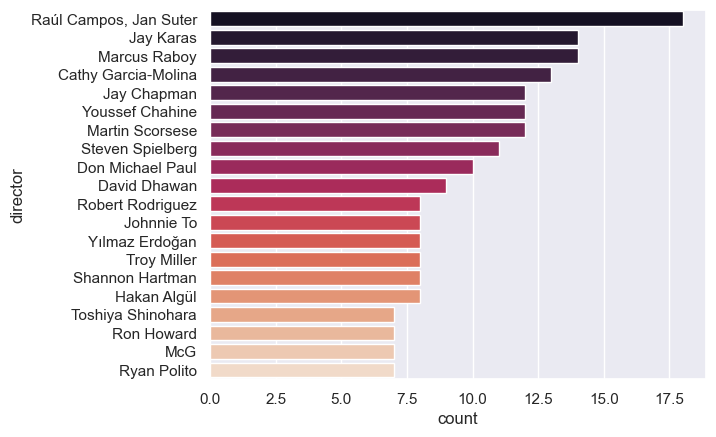

In [28]:
df_movies=df_netflix[df_netflix['type']=='Movie']
sns.countplot(y='director', data=df_movies, order=df_movies['director'].value_counts().index[:20],palette='rocket')

<Axes: ylabel='director'>

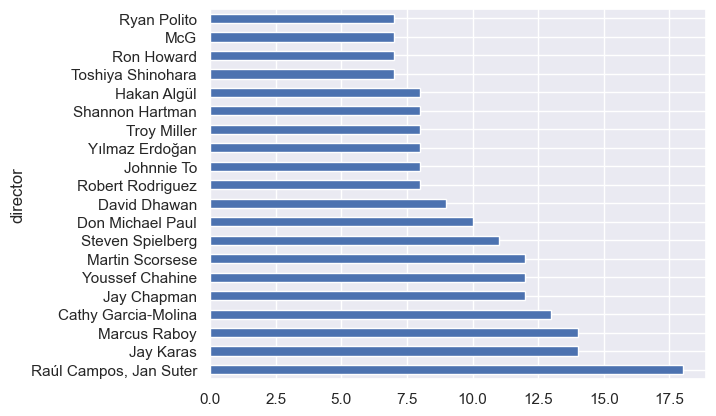

In [29]:
directoresMovies_top20=df_movies['director'].value_counts()[:20]
directoresMovies_top20.plot(kind='barh')


In [30]:
df_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,Mayores 17,125 min,"Dramas, Independent Movies, International Movies"
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,mayores 14,9 Seasons,"British TV Shows, Reality TV"


TOP 20 ANIOS CON MAS PRODUCCIONES EN NETFLIX (PELICULAS Y SERIES)

grafico 1

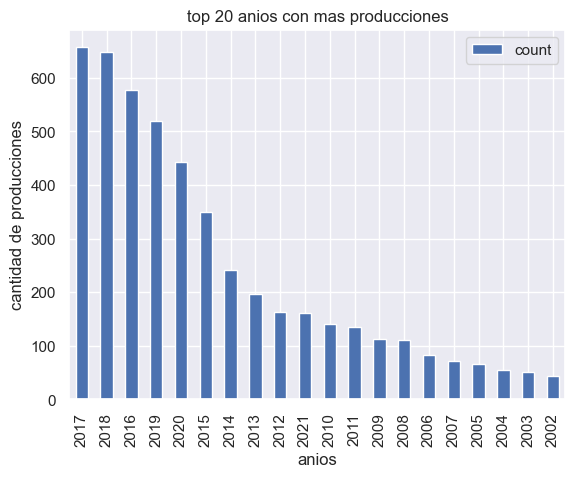

In [42]:
top_20_anios_mas_producciones=df_netflix.release_year.value_counts()[:20]
top_20_anios_mas_producciones=pd.DataFrame(top_20_anios_mas_producciones)
top_20_anios_mas_producciones.plot(kind='bar')
plt.xlabel('anios')
plt.ylabel('cantidad de producciones')
plt.title('top 20 anios con mas producciones')
plt.show()

# podemos ver muy notoriamente que el anio 2017 fue el que mas tuvo producciones

grafico 2

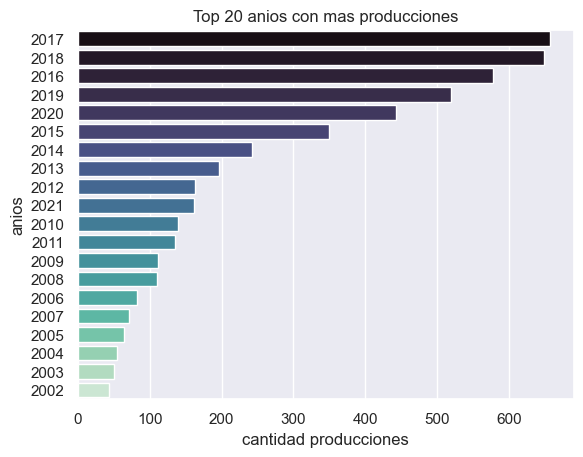

In [66]:
ax=sns.countplot(y='release_year', data=df_netflix, order=df_netflix['release_year'].value_counts().index[:20], palette='mako')
ax.set(xlabel='cantidad producciones', ylabel='anios', title='Top 20 anios con mas producciones')
plt.show()

TOP 20 ANIOS CON MAS PELICULAS LANZADAS


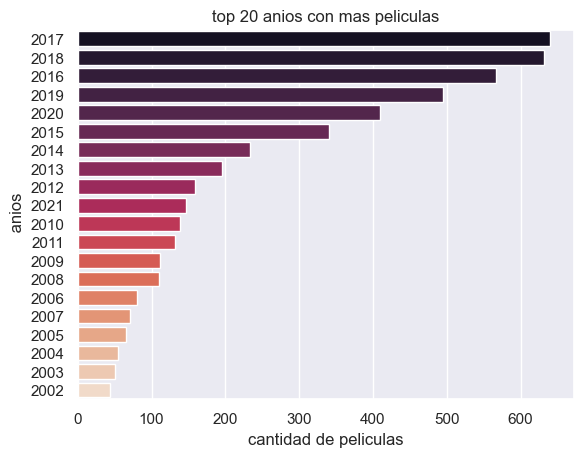

In [65]:
ax=sns.countplot(y=df_movies['release_year'], order=df_movies['release_year'].value_counts().index[:20],palette='rocket')
ax.set(xlabel='cantidad de peliculas', ylabel=' anios', title='top 20 anios con mas peliculas')
plt.show()

# podemos ver muy notoriamente que la grafica de peliculas tiene muchas similitudes a la grafica de cantidad de producciones, debido a que el 97% de producciones son peliculas

In [73]:
df_netflix['type'].value_counts().sum()

5332

<Axes: xlabel='release_year'>

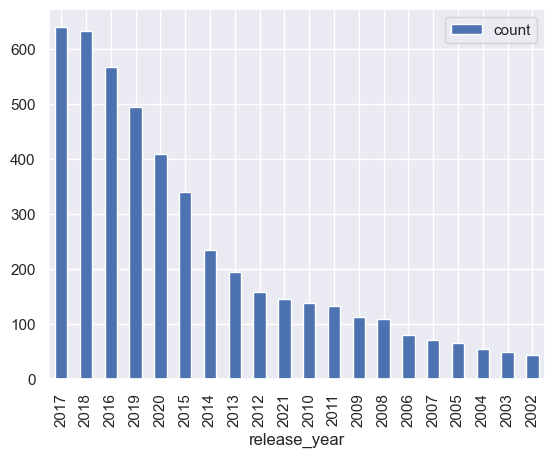

In [64]:
top_anios_movies=df_movies.release_year.value_counts().head(20)
top_anios_movies=pd.DataFrame(top_anios_movies)
top_anios_movies.plot(kind='bar')

In [75]:
df_netflix['type'].value_counts().sum()

5332

resultado de grafica de 'top 20 anios con mas peliculas' es muy parecido a la grafica de 'top 20 anios con mas producciones'

las peliculas representan el 97% de las producciones de este dataframe

cantidad peliculas= 5185

cantidad series= 147

total producciones= 5332

( 5185 / 5332) * 100 = 97.24 

 97% de las producciones de netflix son peliculas

TOP 10 DIRECTORES CON MAS PELICULAS LANZADAS

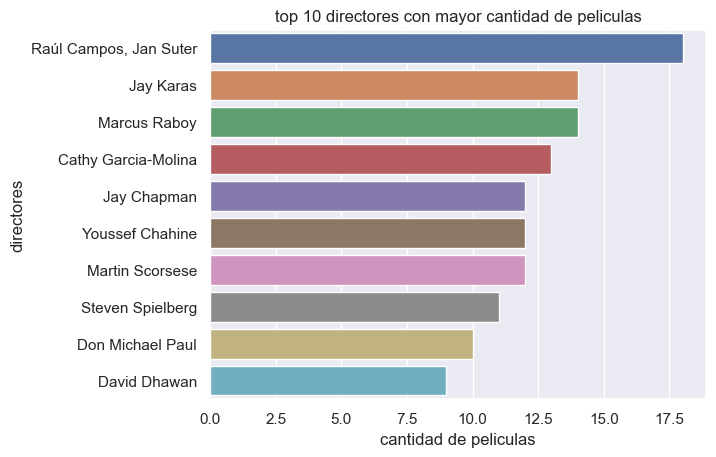

In [78]:
ax=sns.countplot(y='director', data=df_movies, order=df_movies['director'].value_counts().index[:10])
ax.set(xlabel='cantidad de peliculas', ylabel='directores', title='top 10 directores con mayor cantidad de peliculas')
plt.show()

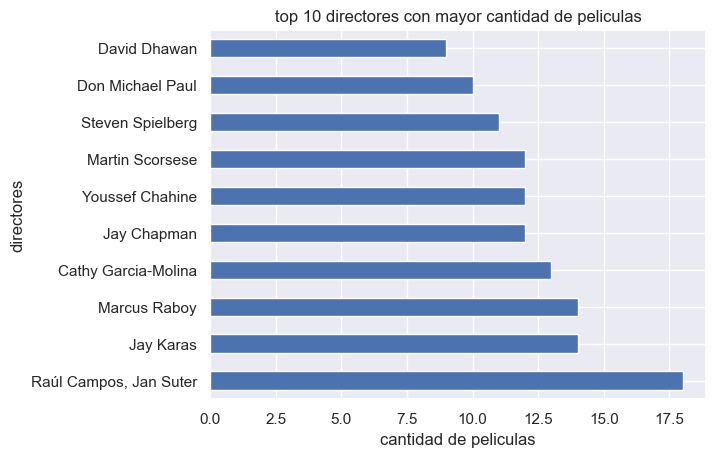

In [82]:
top10_directores_movies=df_movies.director.value_counts().head(10)
top10_directores_movies.plot(kind='barh')
plt.xlabel('cantidad de peliculas')
plt.ylabel('directores')
plt.title('top 10 directores con mayor cantidad de peliculas')
plt.show()